# Análise de Oportunidades de Negócio - Segmento INSS

**Case Técnico de Ciência de Dados**

---

## Objetivo

Este notebook contém a análise completa do case técnico sobre oportunidades de negócio no segmento INSS. O objetivo é responder a 4 perguntas principais:

1. **Parte 1:** Quais são as 30 cidades mais atrativas para expansão?
2. **Parte 2:** Qual a viabilidade financeira do projeto?
3. **Parte 3:** Como a duração dos benefícios impacta o breakeven?
4. **Desafio:** Qual o potencial de um produto de crédito consignado?

---

## Fonte de Dados

- **Origem:** Portal de Dados Abertos do Governo Federal (dados.gov.br)
- **Dataset:** Benefícios Concedidos pelo INSS
- **Período:** Janeiro, Fevereiro e Março de 2025
- **Total de Registros:** 1.565.270 novos benefícios

## 1. Importação de Bibliotecas

In [133]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from typing import Union
import logging
import os
warnings.filterwarnings('ignore')

%matplotlib inline

In [134]:
def read_all_excel_files(relative_path: Union[str, Path]) -> pd.DataFrame:
    """
    Le os arquivos no path fornecido
    """
    # Caminho root
    root_path = Path(os.getcwd()).resolve()
    target_path = (root_path / relative_path).resolve()

    if not target_path.exists():
        raise FileNotFoundError(f"O diretorio '{target_path}' nao encontrado.")
    
    excel_files = list(target_path.glob("*.xlsx"))
    if not excel_files:
        raise ValueError(f"Sem arquivo Excel")

    logging.info(f"{len(excel_files)} arquivos encontrados")

    dataframes = []
    for file in excel_files:
        try:
            df = pd.read_excel(file, skiprows=1, header=0)
            df["file"] = file.name
            dataframes.append(df)
        except Exception as e:
            logging.error(f"Erro ao ler '{file.name}': {e}")

    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df


## 2. Carregamento dos Dados

In [135]:
df = read_all_excel_files("dados")

In [136]:
df.head(10)

,APS,APS.1,Competência concessão,Espécie,Espécie.1,CID,CID.1,Despacho,Despacho.1,Dt Nascimento,...,UF,Qt SM RMI,Ramo Atividade,Dt DCB,Dt DDB,Dt DIB,País de Acordo Internacional,Classificador PA,file,Qt SM RMI
0,2001390,02001390-Aps Feira Grande,202502,31,Auxílio Doenca Previdenciário,M131,M13.1 Monoartrites Ncop,64,Concessao com Analise Documental,1980-08-21,...,Alagoas,1.00,Rural,2025-06-17 00:00:00,2025-02-01,2024-12-20,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
1,2001040,02001040-Aps Maceio - Jatiuca,202502,31,Auxílio Doenca Previdenciário,M169,M16.9 Coxartrose Ne,64,Concessao com Analise Documental,1976-11-01,...,Alagoas,1.00,Comerciario,2025-07-07 00:00:00,2025-02-01,2025-01-09,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
2,2001050,02001050-Aps Maceio - Tabuleiro do Martins,202502,31,Auxílio Doenca Previdenciário,M19,M19 Outr Artroses,64,Concessao com Analise Documental,1970-01-08,...,Alagoas,1.00,Comerciario,2025-07-01 00:00:00,2025-02-01,2025-01-03,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
3,2001110,02001110-Aps Uniao dos Palmares,202502,31,Auxílio Doenca Previdenciário,M859,M85.9 Transt Ne Densidade Estrutura Osseas,64,Concessao com Analise Documental,1963-04-05,...,Alagoas,1.00,Comerciario,2025-04-12 00:00:00,2025-02-01,2025-01-13,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
4,2001110,02001110-Aps Uniao dos Palmares,202502,31,Auxílio Doenca Previdenciário,M511,M51.1 Transt Disco Lombar Outr Intervert Radi,64,Concessao com Analise Documental,1959-02-24,...,Alagoas,1.00,Comerciario,2025-07-08 00:00:00,2025-02-01,2025-01-10,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
5,2001070,02001070-Aps Penedo,202502,31,Auxílio Doenca Previdenciário,S52,S52 Frat do Antebraco,64,Concessao com Analise Documental,1992-03-24,...,Alagoas,1.00,Comerciario,2025-04-01 00:00:00,2025-02-01,2025-01-13,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
6,3001040,03001040-Aps Manaus - Cidade Nova,202502,31,Auxílio Doenca Previdenciário,M179,M17.9 Gonartrose Ne,64,Concessao com Analise Documental,1971-09-09,...,Amazonas,1.12,Comerciario,2025-06-02 00:00:00,2025-02-01,2024-12-05,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
7,3001060,03001060-Aps Manaus - Compensa,202502,31,Auxílio Doenca Previdenciário,K510,K51.0 Enterocolite Ulcerativa,64,Concessao com Analise Documental,1998-11-21,...,Amazonas,1.00,Comerciario,2025-04-11 00:00:00,2025-02-01,2025-01-11,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
8,3001040,03001040-Aps Manaus - Cidade Nova,202502,31,Auxílio Doenca Previdenciário,F19,F19 Transt Ment Comp Mult Drog Out Subst Ps,64,Concessao com Analise Documental,1984-03-30,...,Amazonas,2.01,Comerciario,2025-03-09 00:00:00,2025-02-01,2025-01-09,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN
9,3001070,03001070-Aps Manaus - Aleixo,202502,31,Auxílio Doenca Previdenciário,I20,I20 Angina Pectoris,64,Concessao com Analise Documental,1981-11-20,...,Amazonas,1.02,Comerciario,2025-05-13 00:00:00,2025-02-01,2025-01-02,{ñ class},Sem Pensâo Alimentícia,CONCEDIDOS_DADOS+ABERTOS_FEVEREIRO+2025.xlsx,NaN


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565270 entries, 0 to 1565269
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   APS                           1565270 non-null  int64         
 1   APS.1                         1565270 non-null  object        
 2   Competência concessão         1565270 non-null  int64         
 3   Espécie                       1565270 non-null  int64         
 4   Espécie.1                     1565270 non-null  object        
 5   CID                           1565270 non-null  object        
 6   CID.1                         1565270 non-null  object        
 7   Despacho                      1565270 non-null  object        
 8   Despacho.1                    1113510 non-null  object        
 9   Dt Nascimento                 1565270 non-null  datetime64[ns]
 10  Sexo.                         1565270 non-null  object        
 11

---

## 3. Parte1: Identificação das 30 Cidades Mais Atrativas

In [138]:
# Agrupar or cidade
beneficios_por_cidade = df.groupby('Mun Resid').size().reset_index(name='Total_beneficios')

# Retirar zerados
beneficios_por_cidade = beneficios_por_cidade[
    ~beneficios_por_cidade['Mun Resid'].astype(str).str.contains('Zerada|00000', na=False)
]

beneficios_por_cidade = beneficios_por_cidade.sort_values('Total_beneficios', ascending=False)

# top 30
top_30_cidades = beneficios_por_cidade.head(30).copy().reset_index(drop=True)
top_30_cidades['Posicao'] = range(1, 31)

print("TOP 30 Cidades")
print("-----------------------------------------------------------------")
print(f"\nTop 30 Cidades (por volume de benefícios):")
print("-----------------------------------------------------------------")
print(top_30_cidades[['Posicao', 'Mun Resid', 'Total_beneficios']].to_string(index=False))

TOP 30 Cidades
-----------------------------------------------------------------

Top 30 Cidades (por volume de benefícios):
-----------------------------------------------------------------
 Posicao                      Mun Resid  Total_beneficios
       1             21504-SP-São Paulo             77136
       2        17064-RJ-Rio de Janeiro             37445
       3              23001-DF-Brasília             19996
       4        11062-MG-Belo Horizonte             16405
       5              04275-BA-Salvador             14862
       6             05045-CE-Fortaleza             13690
       7              14068-PR-Curitiba             11772
       8             21189-SP-Guarulhos             10187
       9               08087-GO-Goiânia              9963
      10          19150-RS-Porto Alegre              9927
      11                03028-AM-Manaus              9562
      12                15116-PE-Recife              8889
      13            11702-MG-Uberlândia              87

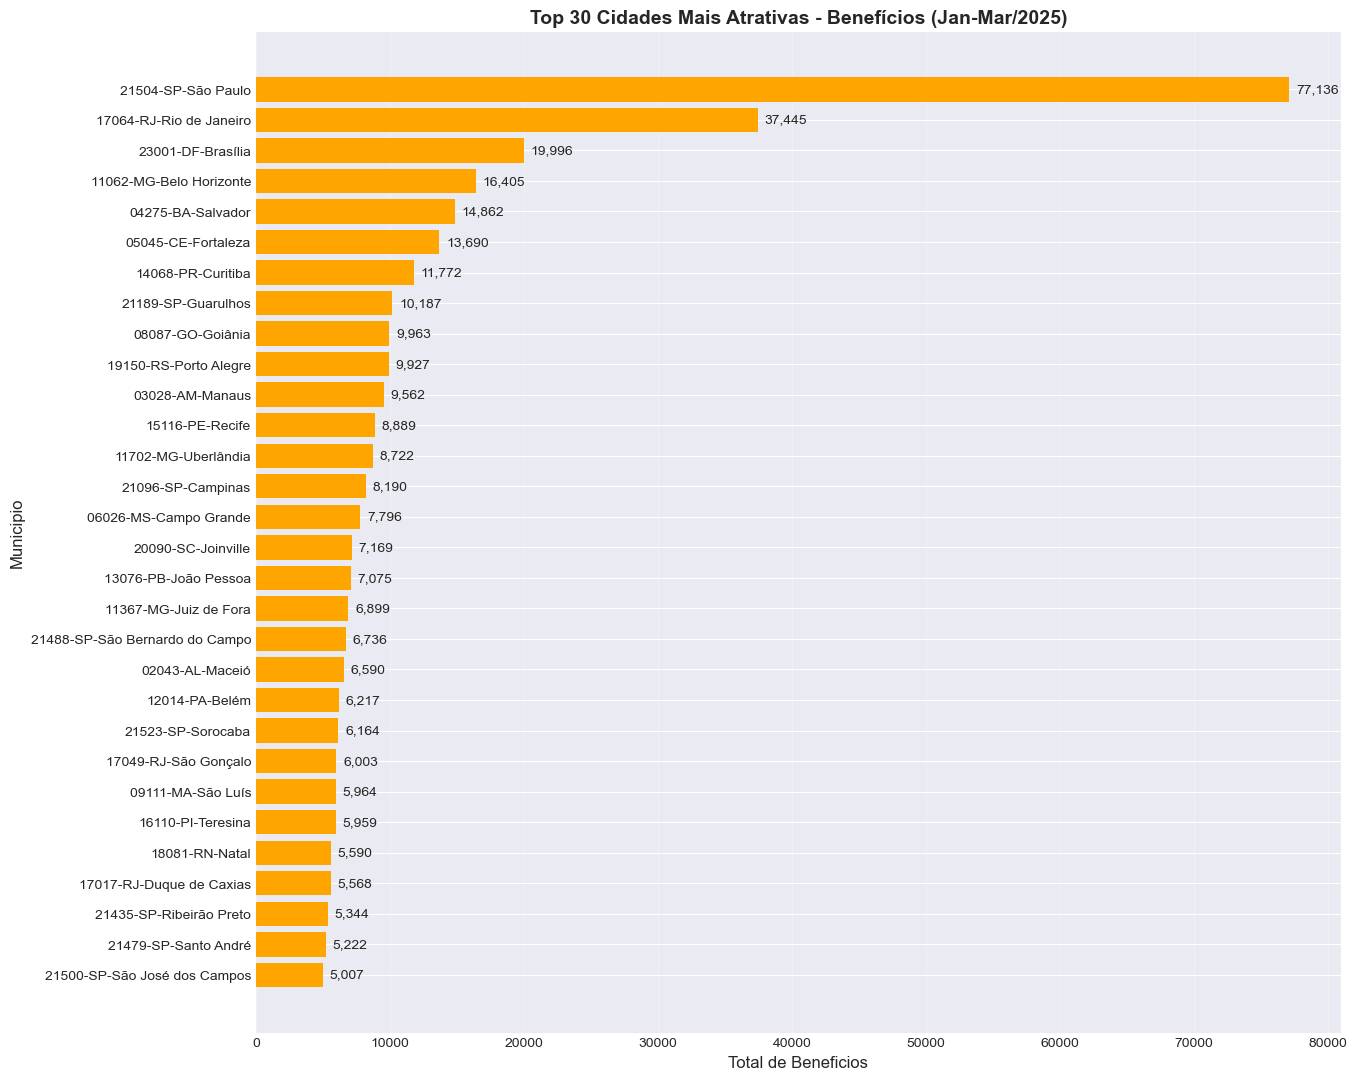

In [139]:
# Visualização: Top 30
plt.figure(figsize=(14, 13))
top_10 = top_30_cidades
plt.barh(range(len(top_10)), top_10['Total_beneficios'], color='orange')
plt.yticks(range(len(top_10)), top_10['Mun Resid'])
plt.xlabel('Total de Beneficios', fontsize=12)
plt.ylabel('Municipio', fontsize=12)
plt.title('Top 30 Cidades Mais Atrativas - Benefícios (Jan-Mar/2025)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_10['Total_beneficios']):
    plt.text(v + 500, i, f'{v:,}', va='center', fontsize=10)

In [140]:
total_top30 = top_30_cidades['Total_beneficios'].sum()
total_geral = df.shape[0]
percentual = (total_top30 / total_geral) * 100

print(f"Total de beneficios (Top 30): {total_top30:,}")
print(f"Total de beneficios (Brasil): {total_geral:,}")
print(f"Concentração: {percentual:.1f}% dos beneficios estão nas Top 30 cidades")

Total de beneficios (Top 30): 356,049
Total de beneficios (Brasil): 1,565,270
Concentração: 22.7% dos beneficios estão nas Top 30 cidades


### Resposta Parte 1

As **30 cidades mais atrativas** foram identificadas com base no volume de novos benefícios concedidos. As top 3 são:

---

## Parte 2: Análise de Viabilidade Financeira

In [141]:
# Parametros
investimento_inicial = 100000  
custo_fixo_mensal = 15000      
custo_p_cliente = 50
receita_p_cliente = 150
margem_contr = receita_p_cliente - custo_p_cliente

print("\nPremissas")
print("-----------------------------------------------------------------------------")
print(f"  Investimento inicial (por agencia):    R$ {investimento_inicial}")
print(f"  Custo fixo mensal (por agencia):       R$ {custo_fixo_mensal}")
print(f"  Custo variavel (por cliente/mes):      R$ {custo_p_cliente}")
print(f"  Receita media (por cliente/mes):       R$ {receita_p_cliente}")
print(f"  Margem de contribuição (por cliente):  R$ {margem_contr}")


Premissas
-----------------------------------------------------------------------------
  Investimento inicial (por agencia):    R$ 100000
  Custo fixo mensal (por agencia):       R$ 15000
  Custo variavel (por cliente/mes):      R$ 50
  Receita media (por cliente/mes):       R$ 150
  Margem de contribuição (por cliente):  R$ 100


### 2.1: Equilibrio Mensal

In [142]:
clientes_equi_mensal = custo_fixo_mensal / margem_contr

print(f"Para cobrir os custos fixos mensais de R$ {custo_fixo_mensal:,.2f},")
print(f"Sao necessários {clientes_equi_mensal:.0f} clientes ativos por mes.")

Para cobrir os custos fixos mensais de R$ 15,000.00,
Sao necessários 150 clientes ativos por mes.


### 2.2: Tempo para Breakeven das 30 Agências

In [143]:
#top 30 cidades
df_top30 = df[df['Mun Resid'].isin(top_30_cidades['Mun Resid'])]

#Media
media_beneficios_mes_top30 = df[df['Mun Resid'].isin(top_30_cidades['Mun Resid'])].shape[0] / 3 

print(f"\nMedia de novos benefícios/mes (Top 30): {media_beneficios_mes_top30:,.0f}")

# calculo
receita_mensal_30_agencias = media_beneficios_mes_top30 * margem_contr
custo_fixo_30_agencias = 30 * custo_fixo_mensal
lucro_mensal = receita_mensal_30_agencias - custo_fixo_30_agencias

print(f"\nReceita mensal (30 agencias):     R$ {receita_mensal_30_agencias:.2f}")
print(f"Custo fixo mensal (30 agencias):    R$ {custo_fixo_30_agencias:.2f}")
print(f"Lucro mensal:                       R$ {lucro_mensal:.2f}")

# Tempo para breakeven
investimento_total_30 = 30 * investimento_inicial
meses_breakeven = investimento_total_30 / lucro_mensal
print(f"\nInvestimento total (30 agências):   R$ {investimento_total_30:.2f}")
print(f"Tempo para recuperar investimento:  {meses_breakeven:.2f} mes (=~ {meses_breakeven * 30:.0f} dias)")


Media de novos benefícios/mes (Top 30): 118,683

Receita mensal (30 agencias):     R$ 11868300.00
Custo fixo mensal (30 agencias):    R$ 450000.00
Lucro mensal:                       R$ 11418300.00

Investimento total (30 agências):   R$ 3000000.00
Tempo para recuperar investimento:  0.26 mes (=~ 8 dias)


#### Tratamento sem conversao de 100%

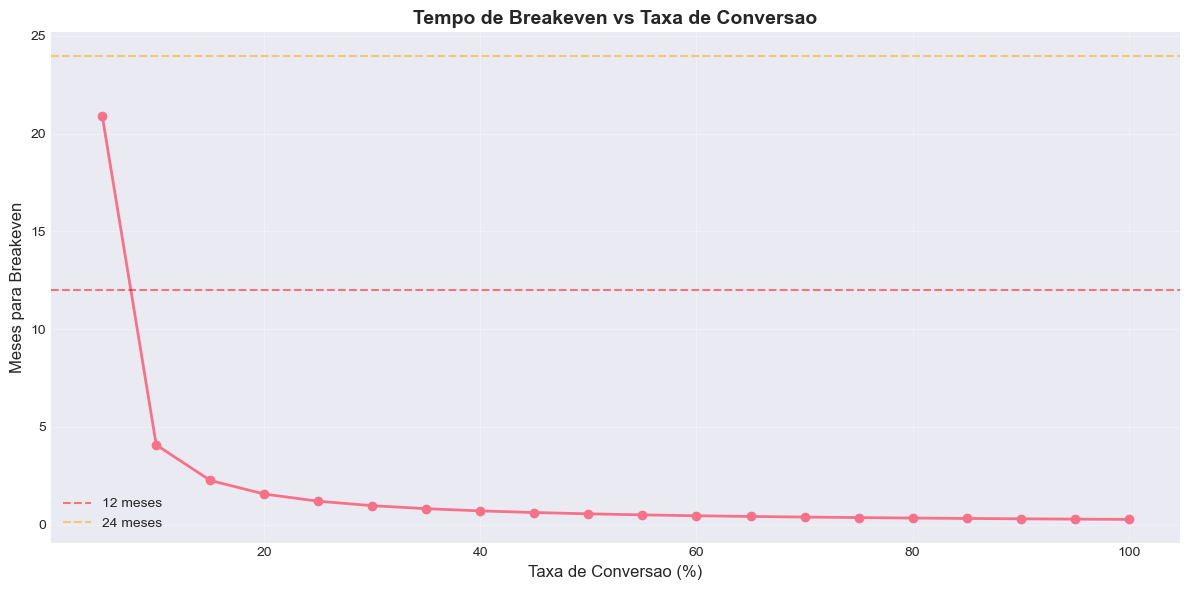

In [144]:
# visualizacao:
taxas_conversao = np.arange(0.05, 1.05, 0.05)
meses_breakeven_list = []

for taxa in taxas_conversao:
    clientes_mes = media_beneficios_mes_top30 * taxa
    receita = clientes_mes * margem_contr
    lucro = receita - custo_fixo_30_agencias
    if lucro > 0:
        meses = investimento_total_30 / lucro
        meses_breakeven_list.append(meses)
    else:
        meses_breakeven_list.append(None)

plt.figure(figsize=(12, 6))
plt.plot(taxas_conversao * 100, meses_breakeven_list, marker='o', linewidth=2, markersize=6)
plt.xlabel('Taxa de Conversao (%)', fontsize=12)
plt.ylabel('Meses para Breakeven', fontsize=12)
plt.title('Tempo de Breakeven vs Taxa de Conversao', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=12, color='r', linestyle='--', label='12 meses', alpha=0.5)
plt.axhline(y=24, color='orange', linestyle='--', label='24 meses', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Resposta Parte-2

**2.1** Sao necessarios 150 clientes por agência para atingir o ponto de equilíbrio mensal.

**2.2** Assumindo 100% de conversão, as 30 agencias atingem o breakeven em 0,26 mes (aproximadamente 8 dias). Podemos ver acima no grafico cenarios mais realistas com conversoes menores e como isso afetaria o tempo para breakeven

---

## Parte 3: Impacto da Duracao dos Beneficios

In [145]:
df['tipo_beneficio'] = df['Espécie.1'].apply(
    lambda x: 'temp' if 'AUXÍLIO' in str(x).upper() or 'AUXILIO' in str(x).upper() 
    else 'permanente'
)

temp_count = (df['tipo_beneficio'] == 'temp').sum()
perm_count = (df['tipo_beneficio'] == 'permanente').sum()

print(f"Distribuicao de Beneficios:")
print("--------------------------------------------------")
print(f"Temporarios (Auxilios):  {temp_count} ({temp_count/len(df)*100:.1f}%)")
print(f"Permanentes:             {perm_count} ({perm_count/len(df)*100:.1f}%)")
print("--------------------------------------------------")

Distribuicao de Beneficios:
--------------------------------------------------
Temporarios (Auxilios):  1001085 (64.0%)
Permanentes:             564185 (36.0%)
--------------------------------------------------


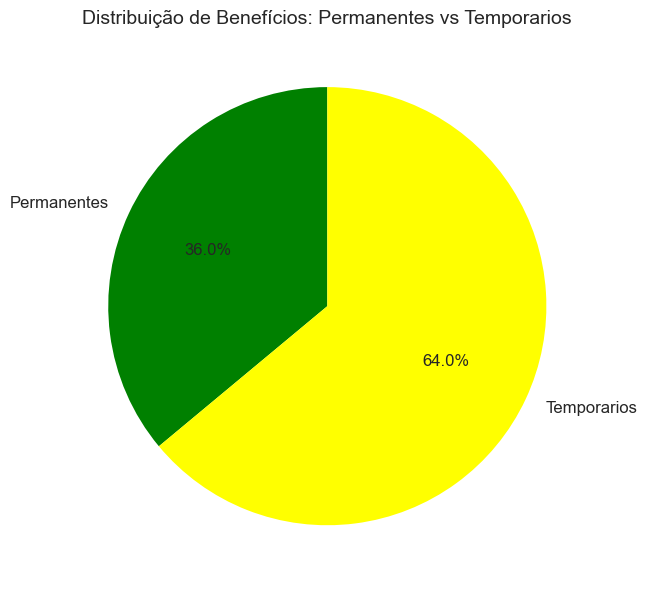

In [146]:
# Visualizacao
plt.figure(figsize=(10, 6))
tipos = ['Permanentes', 'Temporarios']
valores = [perm_count, temp_count]
cores = ["green", "yellow"]

plt.pie(valores, labels=tipos, autopct='%1.1f%%', startangle=90, colors=cores, textprops={'fontsize': 12})
plt.title('Distribuição de Benefícios: Permanentes vs Temporarios', fontsize=14)
plt.tight_layout()
plt.show()

In [147]:
# Calcular idade
df['Dt Nascimento'] = pd.to_datetime(df['Dt Nascimento'], errors='coerce')
df['idade'] = 2025 - df['Dt Nascimento'].dt.year

duracao_temp = 3  # meses
idade_maxima_perm = 80  # anos

df['tempo_permanencia_meses'] = df.apply(
    lambda row: duracao_temp if row['tipo_beneficio'] == 'temp'
    else max(0, (idade_maxima_perm - row['idade']) * 12) if pd.notna(row['idade'])
    else 0,
    axis=1
)

tempo_medio_permanencia = df['tempo_permanencia_meses'].mean()

print(f"Tempo medio de permanencia:")
print("----------------------------------------")
print(f"Tempo medio: {tempo_medio_permanencia:.1f} meses")
print("----------------------------------------")

Tempo medio de permanencia:
----------------------------------------
Tempo medio: 109.8 meses
----------------------------------------


In [148]:
# Calcular taxa de churn mensal
churn_temp = (temp_count / (df.shape[0])) / duracao_temp

print(f"Taxa de Churn:")
print("----------------------------------------")
print(f"Taxa de churn mensal media: {churn_temp*100:.2f}% ao mes")
print("----------------------------------------")

Taxa de Churn:
----------------------------------------
Taxa de churn mensal media: 21.32% ao mes
----------------------------------------


In [149]:
# Simulação de breakeven com rotatividade
print(f"  - Novos clientes/mes (Top 30):  {media_beneficios_mes_top30:,.0f}")
print(f"  - Taxa de churn mensal:         {churn_temp*100:.2f}%")
print(f"  - Margem de contribuicao:       R$ {margem_contr:,.2f}")
print(f"  - Custo fixo (30 agencias):     R$ {custo_fixo_30_agencias:,.2f}")

base_clientes = 0
meses_simulacao = 60
receita_acumulada = 0
custo_acumulado = investimento_total_30

historico_base = []
historico_receita = []
historico_custo = []

mes_breakeven_rotatividade = None

#teste de simulacoes com ate 60 meses

for mes in range(1, meses_simulacao + 1):
    base_clientes += media_beneficios_mes_top30
    
    base_clientes *= (1 - churn_temp)
    
    receita_mes = base_clientes * margem_contr
    custo_mes = custo_fixo_30_agencias
    
    receita_acumulada += receita_mes
    custo_acumulado += custo_mes
    
    historico_base.append(base_clientes)
    historico_receita.append(receita_acumulada)
    historico_custo.append(custo_acumulado)
    
    if receita_acumulada >= custo_acumulado and mes_breakeven_rotatividade is None:
        mes_breakeven_rotatividade = mes
        print(f"\nBreakeven atingido no mes {mes}")
        print(f"  - Base de clientes:      {base_clientes:,.0f}")
        print(f"  - Receita acumulada:     R$ {receita_acumulada:,.2f}")
        print(f"  - Custo acumulado:       R$ {custo_acumulado:,.2f}")
        break

  - Novos clientes/mes (Top 30):  118,683
  - Taxa de churn mensal:         21.32%
  - Margem de contribuicao:       R$ 100.00
  - Custo fixo (30 agencias):     R$ 450,000.00

Breakeven atingido no mes 1
  - Base de clientes:      93,381
  - Receita acumulada:     R$ 9,338,134.36
  - Custo acumulado:       R$ 3,450,000.00


### Resposta Parte-3

Considerando a rotatividade de clientes (churn de ~21.32% ao mês devido aos benefícios temporários), o breakeven ainda e atingido no mes 1.

Apesar da alta rotatividade, o volume de novos beneficiarios é tão grande que compensa amplamente a perda de clientes temporários. O modelo de negócio permanece altamente viável.

---

## DESAFIO OPCIONAL: Produto de Credito Consignado

In [150]:
df_top30 = df[df['Mun Resid'].isin(top_30_cidades['Mun Resid'])]

# Filtrar apenas beneficiários permanentes nas top 30 cidades
df_credito = df_top30[df_top30['tipo_beneficio'] == 'permanente'].copy()

print(f"\nClientes Elegiveis:")
print(f"Total permanentes (Top 30): {(df_credito.shape[0])}")


Clientes Elegiveis:
Total permanentes (Top 30): 127331


In [161]:
df_credito.head(1)['Sexo.'].values[0][0]

'M'

In [174]:
# Definir perfis de crédito
def definir_perfil_credito(row):
    if pd.isna(row['Sexo.']) or pd.isna(row['idade']):
        return None
    
    sexo = str(row['Sexo.'][0]).upper()
    idade = row['idade']
    
    if 'M' in sexo:  # Masculino
        if idade <= 60:
            limite = 20000 
            taxa= 0.016
            prazo= 30
            perfil= 'M_60'
            return [limite, taxa, prazo, perfil]
        elif idade <= 70:
            limite = 15000 
            taxa= 0.016
            prazo= 30
            perfil= 'M_70'
            return [limite, taxa, prazo, perfil]
        elif idade <= 80:
            limite = 10000 
            taxa= 0.016
            prazo= 30
            perfil= 'M_80'
            return [limite, taxa, prazo, perfil]
    elif 'F' in sexo:  # Feminino
        if idade <= 60:
            limite = 20000 
            taxa= 0.016
            prazo= 30
            perfil= 'F_60'
            return [limite, taxa, prazo, perfil]
        elif idade <= 70:
            limite = 10000 
            taxa= 0.016
            prazo= 30
            perfil= 'F_70'
            return [limite, taxa, prazo, perfil]
        elif idade <= 80:
            limite = 10000 
            taxa= 0.016
            prazo= 30
            perfil= 'F_80'
            return [limite, taxa, prazo, perfil]
        elif idade <= 85:
            limite = 5000 
            taxa= 0.016
            prazo= 30
            perfil= 'F_85'
            return [limite, taxa, prazo, perfil]
    
    return [None, None, None, None]

df_credito[['limite', 'taxa', 'prazo', 'perfil']] = list(df_credito.apply(definir_perfil_credito, axis=1).values)
df_credito['perfeil_credito'] = df_credito['limite'].astype(str) +'_'+ df_credito['taxa'].astype(str) +'_'+ df_credito['prazo'].astype(str)+'_'+ df_credito['perfil'].astype(str)
print(f"Clientes sem perfil apto: {df_credito[df_credito['limite'].isna()].shape[0]}")
df_credito = df_credito[df_credito['limite'].notna()]

print(f"Clientes com perfil de crédito definido:    {len(df_credito):,}")

Clientes sem perfil apto: 1532
Clientes com perfil de crédito definido:    125,799


In [175]:
# Parametros do produto
TX_contratacao = 0.20  
fpd = 0.05  

clientes_contratam = int(len(df_credito) * TX_contratacao)

print(f"Clientes que contratarao: {clientes_contratam:,}")

Clientes que contratarao: 25,159


In [ ]:
#receita por perfil
receita_total_primeiro_mes = 0
receita_total_30_meses = 0
valor_emprestado_total = 0

perfis_resumo = []

for perfil_nome in df_credito['perfeil_credito'].unique():
    if perfil_nome is None:
        continue
    
    perfil_data = df_credito[df_credito['perfeil_credito'] == perfil_nome].iloc[0]
    qtd_clientes_perfil = df_credito[df_credito['perfeil_credito'] == perfil_nome].shape[0]
    qtd_contratam = int(qtd_clientes_perfil * TX_contratacao)
    
    limite = perfil_data['limite']
    taxa = perfil_data['taxa']
    prazo = perfil_data['prazo']
    
    # Valor total emprestado no perfil
    valor_emprestado_perfil = qtd_contratam * limite
    valor_emprestado_total += valor_emprestado_perfil
    
    #parcela
    parcela = limite*(taxa*(1+taxa)**prazo) / ((1+taxa)**prazo-1)
    
    # eceita primeiro mes
    juros_primeiro_mes = limite * taxa
    receita_primeiro_mes_perfil = qtd_contratam * juros_primeiro_mes
    receita_total_primeiro_mes += receita_primeiro_mes_perfil
    
    # Receita total
    receita_30_meses_perfil = qtd_contratam * (parcela * prazo - limite)
    receita_total_30_meses += receita_30_meses_perfil
    
    perfis_resumo.append({
        'Perfil': perfil_data['perfil'],
        'Clientes': qtd_contratam,
        'Limite': limite,
        'Valor Emprestado': valor_emprestado_perfil,
        'Parcela': parcela,
        'Receita 1º Mês': receita_primeiro_mes_perfil,
        'Receita 30 Meses': receita_30_meses_perfil
    })

df_perfis = pd.DataFrame(perfis_resumo)

print("\nDetalhamento dos perfis:")
print("-----------------------------------------")
print(df_perfis.to_string(index=False))


Detalhamento dos perfis:
-----------------------------------------
Perfil  Clientes  Limite  Valor Emprestado    Parcela  Receita 1º Mês  Receita 30 Meses
  M_60      4258 20000.0        85160000.0 844.636833       1362560.0      2.273391e+07
  F_60      4325 20000.0        86500000.0 844.636833       1384000.0      2.309163e+07
  M_70      6326 15000.0        94890000.0 633.477625       1518240.0      2.533138e+07
  F_70      8397 10000.0        83970000.0 422.318417       1343520.0      2.241623e+07
  F_80      1181 10000.0        11810000.0 422.318417        188960.0      3.152742e+06
  M_80       438 10000.0         4380000.0 422.318417         70080.0      1.169264e+06
  F_85       232  5000.0         1160000.0 211.159208         18560.0      3.096681e+05


In [172]:
pd.set_option('display.max_columns', None)

### Pargunta D1

In [178]:
print(f"Receita total (juros do primeiro mes): R$ {receita_total_primeiro_mes:,.2f}")

Receita total (juros do primeiro mes): R$ 5,885,920.00


### Pargunta D2

In [ ]:
# Pergunta D2: Lucro em 30 meses
perda_inadimplencia = valor_emprestado_total * fpd
receita_liquida_30_meses = receita_total_30_meses * (1 - fpd)
lucro_30_meses = receita_liquida_30_meses - perda_inadimplencia

print("Pergunta D2: Lucro em 30 meses (considerando 5% de inadimplência)")
print("---------------------------------------------------------------")
print("Valor total emprestado:           R$", f"{valor_emprestado_total:,.2f}")
print("Receita bruta (juros 30 meses):   R$", f"{receita_total_30_meses:,.2f}")
print("Perda por inadimplência (5%):     R$", f"{perda_inadimplencia:,.2f}")
print("Receita liquida (95%):            R$", f"{receita_liquida_30_meses:,.2f}")
print("Lucro liquido (30 meses):         R$", f"{lucro_30_meses:,.2f}")

Pergunta D2: Lucro em 30 meses (considerando 5% de inadimplência)
---------------------------------------------------------------
Valor total emprestado:           R$ 367,870,000.00
Receita bruta (juros 30 meses):   R$ 98,204,827.86
Perda por inadimplência (5%):     R$ 18,393,500.00
Receita líquida (95%):            R$ 93,294,586.47
Lucro líquido (30 meses):         R$ 74,901,086.47
